# CT5170: Principles of ML - Assignment 2
## Course code: 1MAO3
### Participants (name: id): (Daniel Verdejo: 22240224, Thomas Cronin: 22239435)


In [113]:
import pandas as pd
import numpy as np
from seaborn import pairplot
import doctest

import src.perceptron as p
from src.utils import *
from sklearn.metrics import accuracy_score


# Helper Functions
This section

# Data Exploration

In [114]:
# Tom Cronin
wildfires_df = read_data_return_dataframe("wildfires.txt") # Loads The wildfire Dataset

In [115]:
# Tom Cronin
wildfires_df.shape # gets the dimensions of the dataframe

(204, 10)

In [116]:
# Tom Cronin
wildfires_df.columns # gets the features of the columns

Index(['fire', 'year', 'temp', 'humidity', 'rainfall', 'drought_code',
       'buildup_index', 'day', 'month', 'wind_speed'],
      dtype='object')

In [117]:
# Tom Cronin
wildfires_df.dtypes # returns the datatypes

fire              object
year               int64
temp               int64
humidity           int64
rainfall         float64
drought_code     float64
buildup_index    float64
day                int64
month              int64
wind_speed         int64
dtype: object

In [118]:
# Tom Cronin
wildfires_df.describe(include='all')

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
count,204,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.975490,31.906863,62.279412,0.823529,48.537647,16.542304,15.691176,7.553922,16.446078
std,NaN,3.320987,3.814175,15.209388,2.117959,49.133366,14.634994,8.907722,1.196067,3.098074
min,NaN,2007.000000,22.000000,21.000000,0.000000,7.180000,1.320000,1.000000,6.000000,6.000000
25%,NaN,2009.000000,29.000000,52.750000,0.000000,10.627500,6.067500,8.000000,6.000000,14.750000
50%,NaN,2012.000000,32.000000,63.000000,0.000000,30.550000,11.535000,15.500000,8.000000,16.000000
75%,NaN,2015.000000,35.000000,74.250000,0.600000,62.367500,22.665000,24.000000,9.000000,18.000000


## Fire Label
The fire label seems to have 8 unique values for a table that should only have 2, yes or no. We can fix this by re-entering the fire label


In [119]:
ndarray = wildfires_df['fire'].copy()
for index in range(len(ndarray)):
    if 'no' in ndarray[index].lower():
        ndarray[index] = "NO"
    elif 'yes' in ndarray[index].lower():
        ndarray[index] = "YES"
wildfires_df['fire'] = ndarray
labels_copy_df = wildfires_df['fire'].copy()
wildfires_df.describe(include='all')


,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
count,204,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.975490,31.906863,62.279412,0.823529,48.537647,16.542304,15.691176,7.553922,16.446078
std,NaN,3.320987,3.814175,15.209388,2.117959,49.133366,14.634994,8.907722,1.196067,3.098074
min,NaN,2007.000000,22.000000,21.000000,0.000000,7.180000,1.320000,1.000000,6.000000,6.000000
25%,NaN,2009.000000,29.000000,52.750000,0.000000,10.627500,6.067500,8.000000,6.000000,14.750000
50%,NaN,2012.000000,32.000000,63.000000,0.000000,30.550000,11.535000,15.500000,8.000000,16.000000
75%,NaN,2015.000000,35.000000,74.250000,0.600000,62.367500,22.665000,24.000000,9.000000,18.000000


array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'humidity'}>],
       [<AxesSubplot: title={'center': 'rainfall'}>,
        <AxesSubplot: title={'center': 'drought_code'}>,
        <AxesSubplot: title={'center': 'buildup_index'}>],
       [<AxesSubplot: title={'center': 'day'}>,
        <AxesSubplot: title={'center': 'month'}>,
        <AxesSubplot: title={'center': 'wind_speed'}>]], dtype=object)

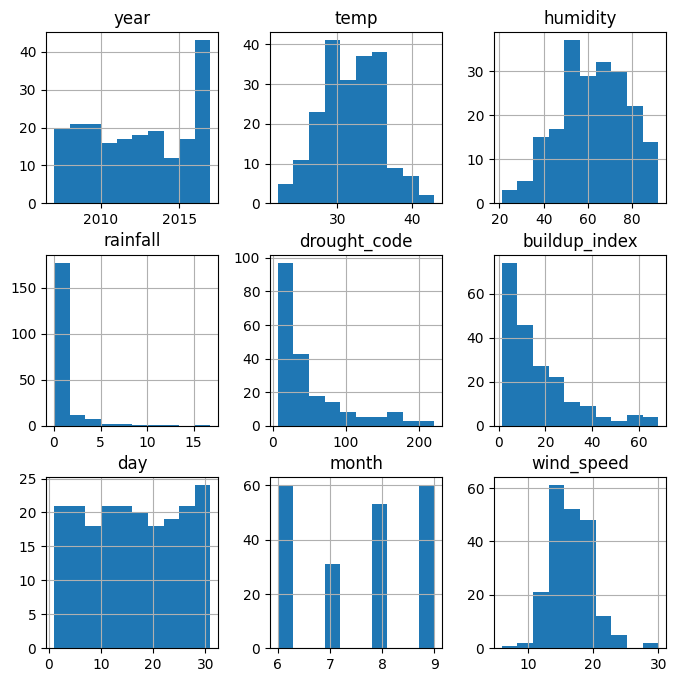

In [120]:
# Tom Cronin
# Lets Look at the data graphically
wildfires_df.hist(figsize = (8,8))

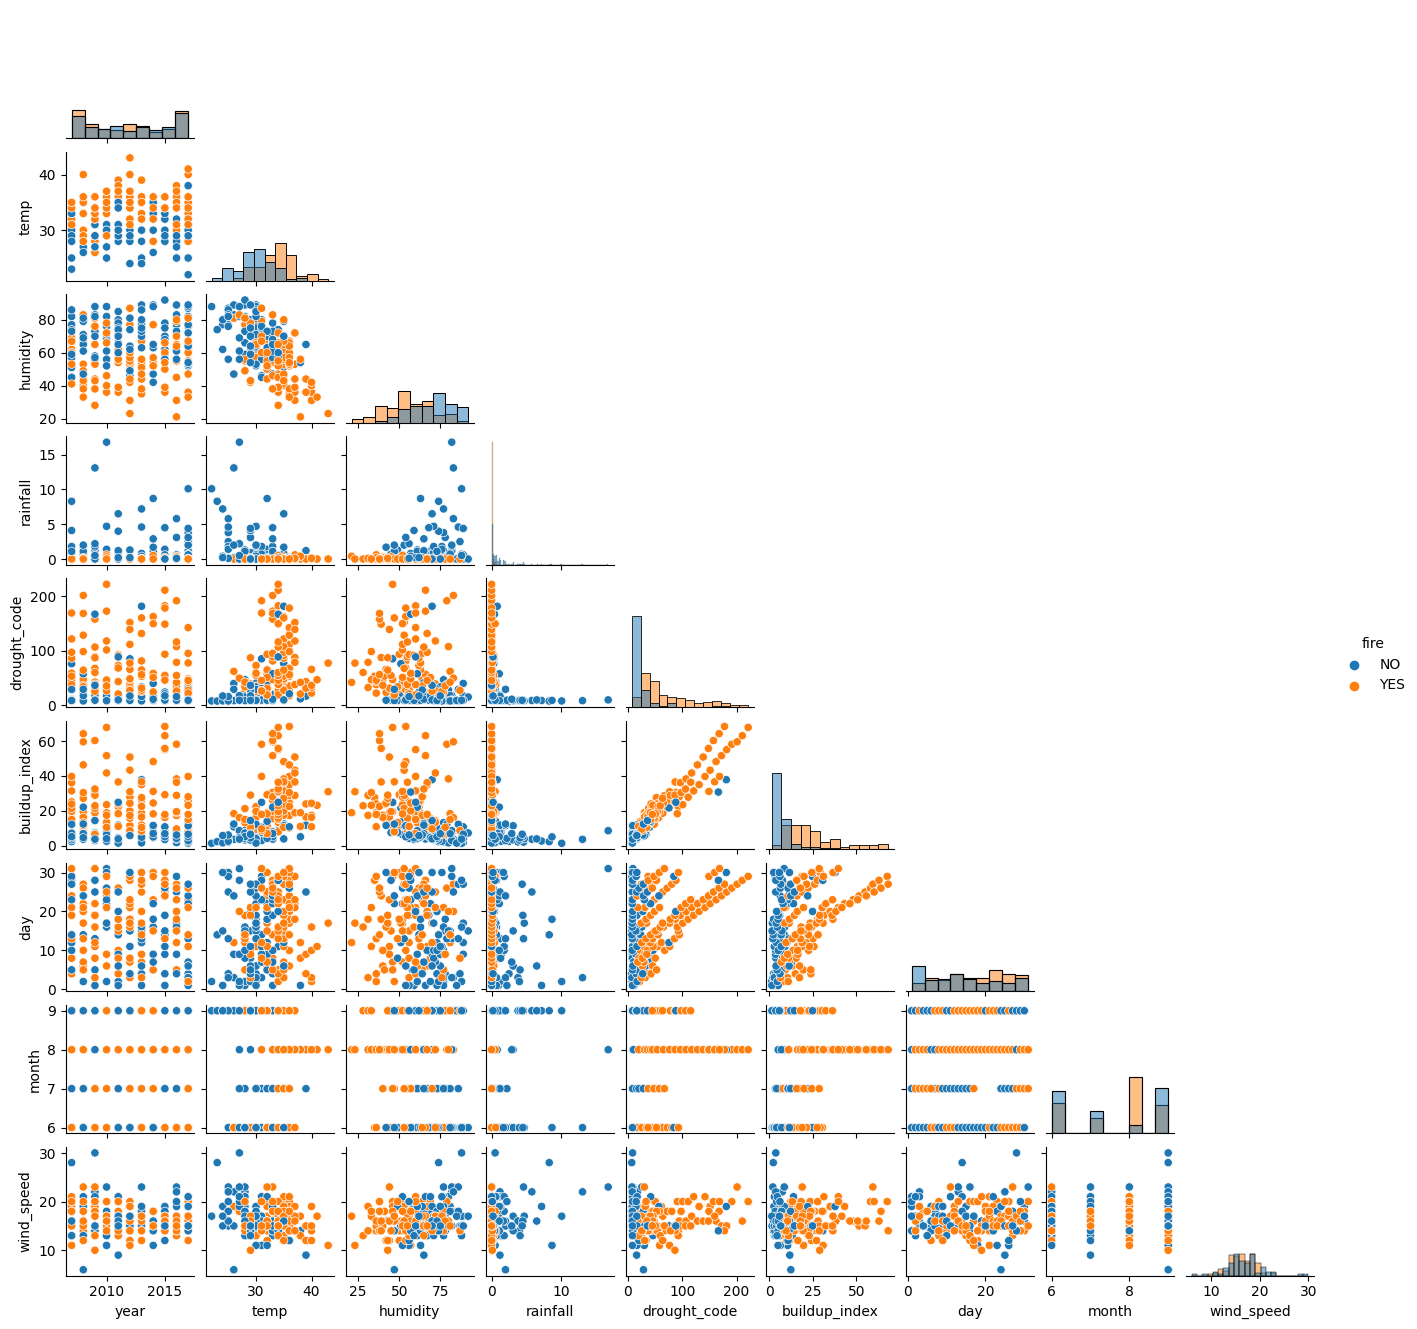

In [121]:

# plot = stripplot(x="fire", y="fire", data=wildfires_df, jitter=0.2, hue="fire")
features = ['year', 'temp', 'humidity', 'rainfall', 'drought_code','buildup_index', 'day', 'month', 'wind_speed'] # list of features wanted
plot = pairplot(data=wildfires_df, hue="fire", diag_kind="hist", corner=True, height=1.5)

In [122]:
# Tom Cronin

wildfires_df_normalised_copy = wildfires_df.copy()
wildfires_features = wildfires_df[features].values # returns a numpy NdArray of the features
wildfires_labels = wildfires_df[['fire']].values # returns a numpy NdArray of the label
wildfires_features_normalise_copy = wildfires_df_normalised_copy[features].values # returns a numpy NdArray of the features
wildfires_features_normalise_copy # Shows the features



array([[2.015e+03, 2.800e+01, 5.900e+01, ..., 1.000e+00, 6.000e+00,
        1.900e+01],
       [2.010e+03, 3.000e+01, 6.100e+01, ..., 2.000e+00, 6.000e+00,
        1.300e+01],
       [2.009e+03, 2.600e+01, 8.300e+01, ..., 3.000e+00, 6.000e+00,
        2.200e+01],
       ...,
       [2.009e+03, 2.700e+01, 8.800e+01, ..., 2.800e+01, 9.000e+00,
        3.000e+01],
       [2.016e+03, 2.500e+01, 5.600e+01, ..., 2.900e+01, 9.000e+00,
        2.000e+01],
       [2.012e+03, 2.400e+01, 6.200e+01, ..., 3.000e+01, 9.000e+00,
        1.700e+01]])

In [123]:


wildfires_features_normalised = normalise(wildfires_features_normalise_copy, features)


In [124]:
wildfires_features_normalised_df = pd.DataFrame(wildfires_features_normalised, columns=features)
wildfires_features_normalised_df['fire'] = labels_copy_df


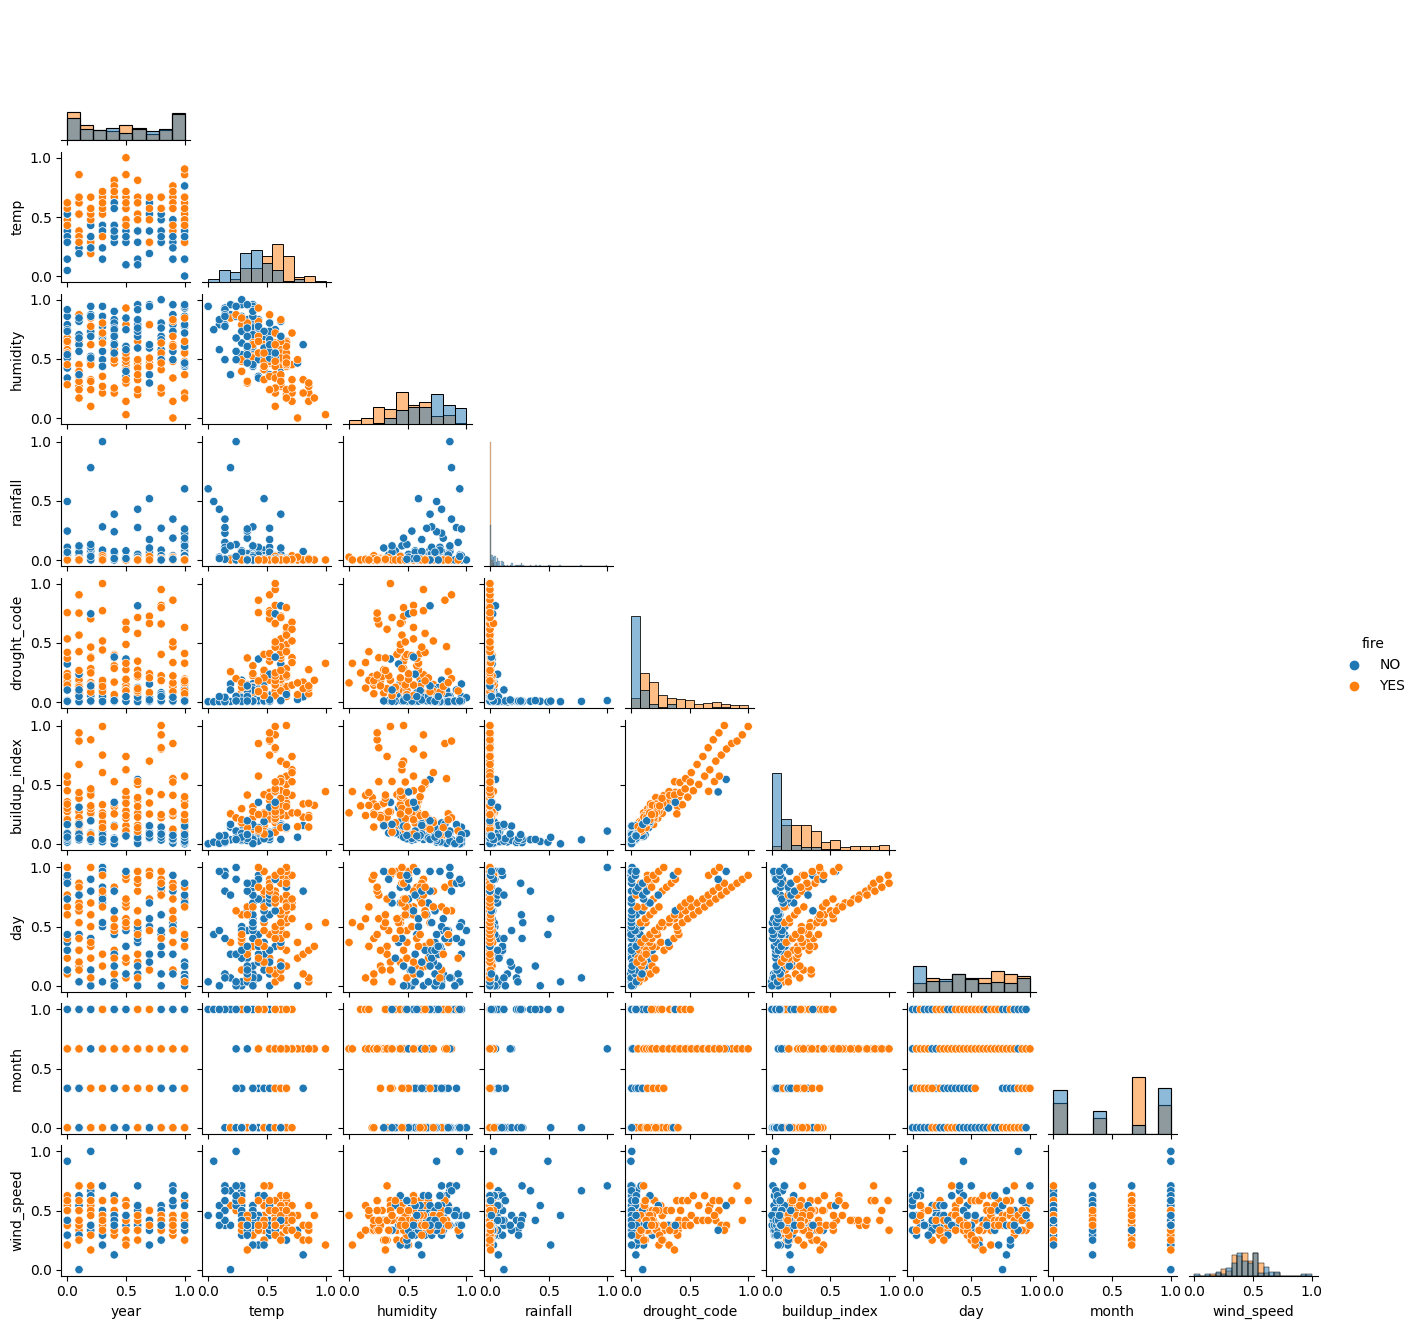

In [125]:
pairplot(data=wildfires_features_normalised_df, hue="fire", diag_kind="hist", corner=True, height=1.5)



# I THINK WE SHOULD USE NORMALISED

In [126]:
# Daniel Verdejo - initial perceptron based on description above
# TODO : Figure out if fit_predict and eval are needed ¯\_(ツ)_/¯


# TODO: remove these when done testing! 
df = read_data_return_dataframe("./wildfires.txt")
df_train, df_test = split_df_to_train_test_dfs(df)
y_train, X_train = split_df_labels_attributes(df_train)

y_train = normalise_outputs(y_train)
y_test, X_test = split_df_labels_attributes(df_test)
y_test = normalise_outputs(y_test)

P = p.Perceptron(.5, 1000).fit(X_train, y_train)
print(y_test)
pred = P.predict(X_test)
pred
accuracy_score(y_test, pred)


[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]


0.9142857142857143

In [127]:
doctest.run_docstring_examples(MLP, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    MLP(n_iters="whoops")
Expecting:
    Traceback (most recent call last):
    ...
    ValueError: n_iters must be an integer and a natural number
ok
Trying:
    MLP(hidden_layer_size=(0,0))
Expecting:
    Traceback (most recent call last):
    ...
    ValueError: hidden_layer_size must contain natural numbers of type int
ok
Trying:
    MLP(learn_rate=0)
Expecting:
    Traceback (most recent call last):
    ...
    ValueError: learn_rate must be a float or int greater than 0
ok
Trying:
    mlp = MLP()
Expecting nothing
ok
Trying:
    mlp
Expecting:
    MLP()
ok
Trying:
    mlp = MLP()
Expecting nothing
ok
Trying:
    mlp.add_layer(np.array([]))
Expecting:
    Traceback (most recent call last):
    ...
    ValueError: layer must be of at least length 1
ok
Trying:
    mlp = MLP(hidden_layer_size=(4,2))
Expecting nothing
ok
Trying:
    mlp.add_layer(np.array([Perceptron() for _ in range(2)]))
Expecting nothing
ok
Trying:
    mlp.layers
Expecting:
    array

C:\Users\danny\AppData\Local\Temp\ipykernel_29116\1931241995.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.layers = np.array(ls)
